In [18]:
import pandas as pd
import numpy as np

# Data Wrangling Imports
from datetime import datetime

# Data Analysis Imports
import statistics
import seaborn as sns
from scipy import linalg
from matplotlib import style
from matplotlib import ticker
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Data Visualization Imports
#import cufflinks as cf
#import chart_studio.plotly as py
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.gridspec import GridSpec

# Econometry Imports
import pandas_ta as ta

# Other Imports
import os
from itertools import product
import warnings
import talib
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.10f}".format

### 2- Depois de cadastrar uma conta na [Binance](https://www.binance.com/pt-BR) é necessário inserir os parâmetros key e secret da API

In [19]:
from binance.client import Client
%run chaves02.ipynb
client = Client(key,secret)

In [20]:
# Escolhe o par
TRADING_PAIR = 'BTCBRL'
# Data de Inicio da Captura dos Dados
STARTING_DATE = "5 Mar, 2021"
# Data Final da Captura dos Dados
END_DATE = "12 Mar, 2021"

In [21]:
def process_message(msg):
    if msg['e'] == 'error':
        bm.stop_socket(conn_key)
        bm.close()
    else:
        pass

In [22]:
time_res = client.get_server_time()
time_res

{'serverTime': 1616211383182}

### 3- Obtenção de informações via API da Binance e construção do dataframe __data__

### [Binance Websockets API](https://python-binance.readthedocs.io/en/latest/websockets.html)

In [23]:
# Importing Binance Websockets API
from binance.client import *
from binance.websockets import BinanceSocketManager
from twisted.internet import reactor

# Initialize Binance Socket Manager
bm = BinanceSocketManager(client, user_timeout=60)
list_messages = []
conn_key = bm.start_trade_socket(TRADING_PAIR, process_message)
bm.start


<bound method Thread.start of <BinanceSocketManager(Thread-7, initial)>>

In [24]:
candles = client.get_klines(symbol=TRADING_PAIR, interval=Client.KLINE_INTERVAL_1MINUTE)

In [25]:
# Old Get klines from Binance Python API
#klines = client.get_historical_klines("ONEBNB", Client.KLINE_INTERVAL_1MINUTE, STARTING_DATE, END_DATE)

In [26]:
indexes = ['Open Time', 'Open', 'High','Low', 'Close', 'Volume', 'Close Time', 'QAV', 'No. Trades', 'Taker BBAV', 'Taker BQAV', 'Ignore']
data = pd.DataFrame(columns=indexes,data=candles)

In [27]:
data[:10]

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Ignore
0,1616181420000,326107.00000000,326110.00000000,325864.00000000,326100.00000000,0.01361800,1616181479999,4439.09490900,26,0.00625600,2040.08414100,0
1,1616181480000,326100.00000000,326110.00000000,325791.00000000,325800.00000000,0.16689500,1616181539999,54387.70710500,24,0.01102300,3594.61098600,0
2,1616181540000,326099.00000000,326099.00000000,325800.00000000,325999.00000000,0.17841200,1616181599999,58131.18882600,17,0.02262200,7374.80104100,0
3,1616181600000,325999.00000000,325999.00000000,325800.00000000,325999.00000000,0.04669800,1616181659999,15216.76316200,9,0.01283800,4185.17516200,0
4,1616181660000,325999.00000000,325999.00000000,325800.00000000,325999.00000000,0.06399100,1616181719999,20860.36242300,17,0.06077700,19813.24122300,0
5,1616181720000,325999.00000000,326108.00000000,325905.00000000,326108.00000000,0.18288300,1616181779999,59630.54139700,41,0.17432900,56842.75002700,0
6,1616181780000,326108.00000000,326390.00000000,325913.00000000,326136.00000000,0.15449100,1616181839999,50393.99663900,27,0.13048400,42564.51592500,0
7,1616181840000,326390.00000000,326663.00000000,326136.00000000,326663.00000000,0.05939100,1616181899999,19386.93781400,20,0.05918700,19320.40006400,0
8,1616181900000,326663.00000000,326697.00000000,326325.00000000,326696.00000000,0.00696600,1616181959999,2275.55680300,18,0.00681400,2225.95540300,0
9,1616181960000,326697.00000000,326700.00000000,326458.00000000,326700.00000000,0.08310500,1616182019999,27136.95693100,27,0.01910000,6239.93229000,0


In [28]:
len(data)

500

In [29]:
data.to_csv("CryptoBot_202103006Mv001.csv", index = False)

In [30]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [31]:
data.dtypes
data['Open Time'] = data['Open Time'].apply(lambda x: datetime.fromtimestamp(int(x)/1000))
data.set_index(['Open Time'], inplace=True)
# data['Open'] = data['Open'].astype(float)
# data['High'] = data['High'].astype(float)
# data['Low'] = data['Low'].astype(float)
data['Close'] = data['Close'].astype(float)
data['Volume'] = data['Volume'].astype(float)
# data['QAV'] = data['QAV'].astype(float)
# data['Taker BBAV'] = data['Taker BBAV'].astype(float)
# data['Taker BQAV'] = data['Taker BQAV'].astype(float)

In [35]:
data[:4]

,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Ignore
Open Time,,,,,,,,,,,
2021-03-19 16:17:00,326107.0000000000,326110.0000000000,325864.0000000000,326100.0000000000,0.0136180000,1616181479999,4439.0949090000,26,0.0062560000,2040.0841410000,0
2021-03-19 16:18:00,326100.0000000000,326110.0000000000,325791.0000000000,325800.0000000000,0.1668950000,1616181539999,54387.7071050000,24,0.0110230000,3594.6109860000,0
2021-03-19 16:19:00,326099.0000000000,326099.0000000000,325800.0000000000,325999.0000000000,0.1784120000,1616181599999,58131.1888260000,17,0.0226220000,7374.8010410000,0
2021-03-19 16:20:00,325999.0000000000,325999.0000000000,325800.0000000000,325999.0000000000,0.0466980000,1616181659999,15216.7631620000,9,0.0128380000,4185.1751620000,0


## Pattern Recognition Functions

### 5.7.1. CDL2CROWS - Two Crows

In [45]:
open_ = data["Open"]
high = data["High"]
low = data["Low"]
close = data["Close"]

In [64]:
integer = talib.CDL2CROWS(open_*10**10, high*10**10, low*10**10, close*10**10)

In [68]:
pd.set_option("display.max_rows", None)
integer

Open Time
2021-03-19 16:17:00    0
2021-03-19 16:18:00    0
2021-03-19 16:19:00    0
2021-03-19 16:20:00    0
2021-03-19 16:21:00    0
2021-03-19 16:22:00    0
2021-03-19 16:23:00    0
2021-03-19 16:24:00    0
2021-03-19 16:25:00    0
2021-03-19 16:26:00    0
2021-03-19 16:27:00    0
2021-03-19 16:28:00    0
2021-03-19 16:29:00    0
2021-03-19 16:30:00    0
2021-03-19 16:31:00    0
2021-03-19 16:32:00    0
2021-03-19 16:33:00    0
2021-03-19 16:34:00    0
2021-03-19 16:35:00    0
2021-03-19 16:36:00    0
2021-03-19 16:37:00    0
2021-03-19 16:38:00    0
2021-03-19 16:39:00    0
2021-03-19 16:40:00    0
2021-03-19 16:41:00    0
2021-03-19 16:42:00    0
2021-03-19 16:43:00    0
2021-03-19 16:44:00    0
2021-03-19 16:45:00    0
2021-03-19 16:46:00    0
2021-03-19 16:47:00    0
2021-03-19 16:48:00    0
2021-03-19 16:49:00    0
2021-03-19 16:50:00    0
2021-03-19 16:51:00    0
2021-03-19 16:52:00    0
2021-03-19 16:53:00    0
2021-03-19 16:54:00    0
2021-03-19 16:55:00    0
2021-03-19 16:5

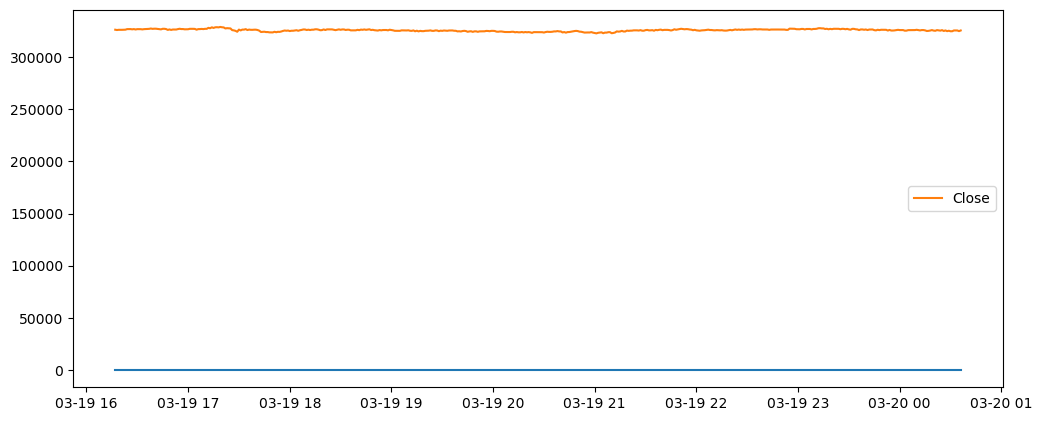

In [69]:

data_CDL2CROWS = pd.DataFrame({"integer": integer})

data_CDL2CROWS = data_CDL2CROWS[["integer"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_CDL2CROWS)


#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']

line_p = plt.plot(data_p.index, data_p)


plt.legend(line, data_CDL2CROWS.columns)
plt.legend(line_p, data_p.columns)
plt.show()

### 5.7.2. CDL3BLACKCROWS - Three Black Crows

In [103]:
integer = talib.CDL3BLACKCROWS(open_, high, low, close)

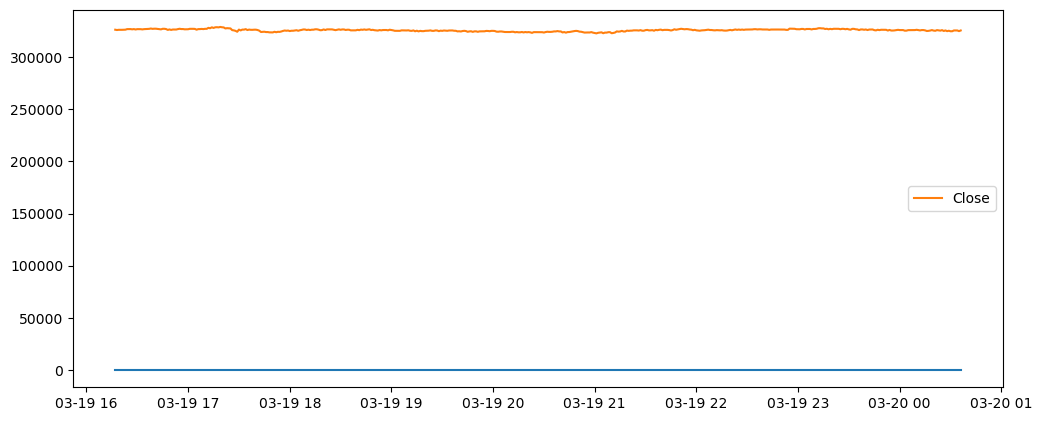

In [70]:

data_CDL3BLACKCROWS = pd.DataFrame({"integer": integer})

data_CDL3BLACKCROWS = data_CDL2CROWS[["integer"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_CDL3BLACKCROWS)


#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']

line_p = plt.plot(data_p.index, data_p)


plt.legend(line, data_CDL2CROWS.columns)
plt.legend(line_p, data_p.columns)
plt.show()

### 5.7.3. CDL3INSIDE - Three Inside Up/Down

In [104]:
integer = talib.CDL3INSIDE(open_, high, low, close)

### 5.7.4. CDL3LINESTRIKE - Three-Line Strike

In [105]:
integer = talib.CDL3LINESTRIKE(open_, high, low, close)

### 5.7.5. CDL3OUTSIDE - Three Outside Up/Down

In [106]:
integer = talib.CDL3OUTSIDE(open_, high, low, close)

### 5.7.6. CDL3STARSINSOUTH - Three Stars In The South

In [107]:
integer = talib.CDL3STARSINSOUTH(open_, high, low, close)

### 5.7.7. CDL3WHITESOLDIERS - Three Advancing White Soldiers

In [108]:
integer = talib.CDL3WHITESOLDIERS(open_, high, low, close)

### 5.7.8. CDLABANDONEDBABY - Abandoned Baby

In [109]:
integer = talib.CDLABANDONEDBABY(open_, high, low, close, penetration=0)

### 5.7.9. CDLADVANCEBLOCK - Advance Block

In [110]:
integer = talib.CDLADVANCEBLOCK(open_, high, low, close)

### 5.7.10. CDLBELTHOLD - Belt-hold

In [111]:
integer = talib.CDLBELTHOLD(open_, high, low, close)

### 5.7.11. CDLBREAKAWAY - Breakaway

In [112]:
integer = talib.CDLBREAKAWAY(open_, high, low, close)

### 5.7.12. CDLCLOSINGMARUBOZU - Closing Marubozu

In [113]:
integer = talib.CDLCLOSINGMARUBOZU(open_, high, low, close)

### 5.7.13. CDLCONCEALBABYSWALL - Concealing Baby Swallow

In [114]:
integer = talib.CDLCONCEALBABYSWALL(open_, high, low, close)

### 5.7.14. CDLCOUNTERATTACK - Counterattack

In [115]:
integer = talib.CDLCOUNTERATTACK(open_, high, low, close)

### 5.7.15. CDLDARKCLOUDCOVER - Dark Cloud Cover

In [116]:
integer = talib.CDLDARKCLOUDCOVER(open_, high, low, close, penetration=0)

### 5.7.16. CDLDOJI - Doji

In [117]:
integer = talib.CDLDOJI(open_, high, low, close)

### 5.7.17. CDLDOJISTAR - Doji Star

In [118]:
integer = talib.CDLDOJISTAR(open_, high, low, close)

### 5.7.18. CDLDRAGONFLYDOJI - Dragonfly Doji

In [119]:
integer = talib.CDLDRAGONFLYDOJI(open_, high, low, close)

### 5.7.19. CDLENGULFING - Engulfing Pattern

In [120]:
integer = talib.CDLENGULFING(open_, high, low, close)

### 5.7.20. CDLEVENINGDOJISTAR - Evening Doji Star

In [121]:
integer = talib.CDLEVENINGDOJISTAR(open_, high, low, close, penetration=0)

### 5.7.21. CDLEVENINGSTAR - Evening Star

In [122]:
integer = talib.CDLEVENINGSTAR(open_, high, low, close, penetration=0)

### 5.7.22. CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines

In [123]:
integer = talib.CDLGAPSIDESIDEWHITE(open_, high, low, close)

### 5.7.23. CDLGRAVESTONEDOJI - Gravestone Doji

In [124]:
integer = talib.CDLGRAVESTONEDOJI(open_, high, low, close)

### 5.7.24. CDLHAMMER - Hammer

In [125]:
integer = talib.CDLHAMMER(open_, high, low, close)

### 5.7.25. CDLHANGINGMAN - Hanging Man

In [126]:
integer = talib.CDLHANGINGMAN(open_, high, low, close)

### 5.7.26. CDLHARAMI - Harami Pattern

In [127]:
integer = talib.CDLHARAMI(open_, high, low, close)

### 5.7.27. CDLHARAMICROSS - Harami Cross Pattern

In [128]:
integer = talib.CDLHARAMICROSS(open_, high, low, close)

### 5.7.28. CDLHIGHWAVE - High-Wave Candle

In [129]:
integer = talib.CDLHIGHWAVE(open_, high, low, close)

### 5.7.29. CDLHIKKAKE - Hikkake Pattern

In [130]:
integer = talib.CDLHIKKAKE(open_, high, low, close)

### 5.7.30. CDLHIKKAKEMOD - Modified Hikkake Pattern

In [131]:
integer = talib.CDLHIKKAKEMOD(open_, high, low, close)

### 5.7.31. CDLHOMINGPIGEON - Homing Pigeon

In [132]:
integer = talib.CDLHOMINGPIGEON(open_, high, low, close)

### 5.7.32. CDLIDENTICAL3CROWS - Identical Three Crows

In [133]:
integer = talib.CDLIDENTICAL3CROWS(open_, high, low, close)

### 5.7.33. CDLINNECK - In-Neck Pattern

In [134]:
integer = talib.CDLINNECK(open_, high, low, close)

### 5.7.34. CDLINVERTEDHAMMER - Inverted Hammer

In [135]:
integer = talib.CDLINVERTEDHAMMER(open_, high, low, close)

### 5.7.35. CDLKICKING - Kicking

In [136]:
integer = talib.CDLKICKING(open_, high, low, close)

### 5.7.36. CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu

In [137]:
integer = talib.CDLKICKINGBYLENGTH(open_, high, low, close)

### 5.7.37. CDLLADDERBOTTOM - Ladder Bottom

In [138]:
integer = talib.CDLLADDERBOTTOM(open_, high, low, close)

### 5.7.38. CDLLONGLEGGEDDOJI - Long Legged Doji

In [139]:
integer = talib.CDLLONGLEGGEDDOJI(open_, high, low, close)

### 5.7.39. CDLLONGLINE - Long Line Candle

In [140]:
integer = talib.CDLLONGLINE(open_, high, low, close)

### 5.7.40. CDLMARUBOZU - Marubozu

In [141]:
integer = talib.CDLMARUBOZU(open_, high, low, close)

### 5.7.41. CDLMATCHINGLOW - Matching Low

In [142]:
integer = talib.CDLMATCHINGLOW(open_, high, low, close)

### 5.7.42. CDLMATHOLD - Mat Hold

In [143]:
integer = talib.CDLMATHOLD(open_, high, low, close, penetration=0)

### 5.7.43. CDLMORNINGDOJISTAR - Morning Doji Star

In [144]:
integer = talib.CDLMORNINGDOJISTAR(open_, high, low, close, penetration=0)

### 5.7.44. CDLMORNINGSTAR - Morning Star

In [145]:
integer = talib.CDLMORNINGSTAR(open_, high, low, close, penetration=0)

### 5.7.45. CDLONNECK - On-Neck Pattern

In [146]:
integer = talib.CDLONNECK(open_, high, low, close)

### 5.7.46. CDLPIERCING - Piercing Pattern

In [147]:
integer = talib.CDLPIERCING(open_, high, low, close)

### 5.7.47. CDLRICKSHAWMAN - Rickshaw Man

In [148]:
integer = talib.CDLRICKSHAWMAN(open_, high, low, close)

### 5.7.48. CDLRISEFALL3METHODS - Rising/Falling Three Methods

In [149]:
integer = talib.CDLRISEFALL3METHODS(open_, high, low, close)

### 5.7.49. CDLSEPARATINGLINES - Separating Lines

In [150]:
integer = talib.CDLSEPARATINGLINES(open_, high, low, close)

### 5.7.50. CDLSHOOTINGSTAR - Shooting Star

In [151]:
integer = talib.CDLSHOOTINGSTAR(open_, high, low, close)

### 5.7.51. CDLSHORTLINE - Short Line Candle

In [152]:
integer = talib.CDLSHORTLINE(open_, high, low, close)

### 5.7.52. CDLSPINNINGTOP - Spinning Top

In [153]:
integer = talib.CDLSPINNINGTOP(open_, high, low, close)

### 5.7.53. CDLSTALLEDPATTERN - Stalled Pattern

In [154]:
integer = talib.CDLSTALLEDPATTERN(open_, high, low, close)

### 5.7.54. CDLSTICKSANDWICH - Stick Sandwich

In [155]:
integer = talib.CDLSTICKSANDWICH(open_, high, low, close)

### 5.7.55. CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)

In [156]:
integer = talib.CDLTAKURI(open_, high, low, close)

### 5.7.56. CDLTASUKIGAP - Tasuki Gap

In [157]:
integer = talib.CDLTASUKIGAP(open_, high, low, close)

### 5.7.57. CDLTHRUSTING - Thrusting Pattern

In [158]:
integer = talib.CDLTHRUSTING(open_, high, low, close)

### 5.7.58. CDLTRISTAR - Tristar Pattern

In [159]:
integer = talib.CDLTRISTAR(open_, high, low, close)

### 5.7.59. CDLUNIQUE3RIVER - Unique 3 River

In [160]:
integer = talib.CDLUNIQUE3RIVER(open_, high, low, close)

### 5.7.60. CDLUPSIDEGAP2CROWS - Upside Gap Two Crows

In [161]:
integer = talib.CDLUPSIDEGAP2CROWS(open_, high, low, close)

### 5.7.61. CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods

In [162]:
integer = talib.CDLXSIDEGAP3METHODS(open_, high, low, close)